#### pandas data 호출

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [64]:
path = 'C:/Users/tmznq/workspace/ml_scratch/dataset/titanic/train.csv'
path2 = 'C:/Users/tmznq/workspace/ml_scratch/dataset/titanic/test.csv'
path3 = 'C:/Users/tmznq/workspace/ml_scratch/dataset/titanic/gender_submission.csv'
data = pd.read_csv(path)
data2 = pd.read_csv(path2)
data3 = pd.read_csv(path3)

df = data
df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### crosstab 실습하기
- 2개의 column의 빈도 수를 알기 위해 사용.
- 주로 종류가 한정되어 있는 columns에 사용 ex) Survived, Pclass, Sex, Sibsp, Parch, Embarked

In [65]:
df_ = pd.crosstab(index=df['Survived'], columns=df['Pclass'])
df_

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


### hist
- 연속된 data처리 할 때 사용.
- bins를 지정해서 구간을 나눌 수 있다.

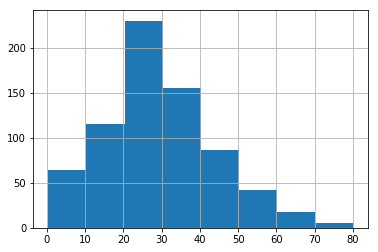

In [66]:
df['Age'].hist(bins=8)

### kde
- 밀도를 알아보기 쉽다.
- smooth line을 그려준다.

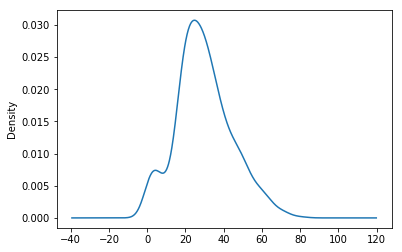

In [67]:
df['Age'].plot(kind='kde')

### scatter & 상관관계 알아보기.

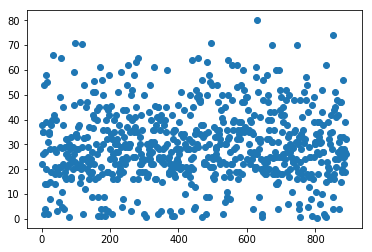

In [68]:
plt.scatter(df['PassengerId'], df['Age'])

- PassengerId와 Age는 아무런 상관이 없음을 알 수 있다.

### pandas-summary
- describe()보다 자세한 요약을 보여준다.

In [69]:
from pandas_summary import DataFrameSummary
dfs = DataFrameSummary(df)
dfs.columns_stats

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,891,891,891,891,891,714,891,891,891,891,204,889
uniques,891,2,3,891,2,88,7,7,681,248,147,3
missing,0,0,0,0,0,177,0,0,0,0,687,2
missing_perc,0%,0%,0%,0%,0%,19.87%,0%,0%,0%,0%,77.10%,0.22%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


- Cabin의 결측치가 많다는 것을 알 수 있음.

### axes.flat
- 접근을 용이하게 하기 위해 axes array를 1차원 array로 바꿈 ex. 2 x 2 => [0, 1, 2, 3]
- for문으로 응용가능

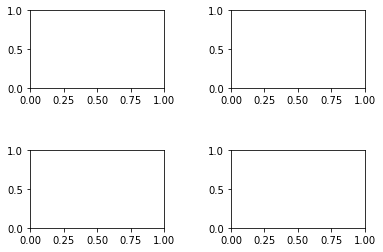

In [70]:
fig , axes = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.5, hspace=0.8)

In [71]:
axes[0] # axes array의 0번째 행의 ax가 나옴

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA48C694A8>,
      dtype=object)

In [72]:
axes.flat[0] # 1차원 array의 0번째가 나옴

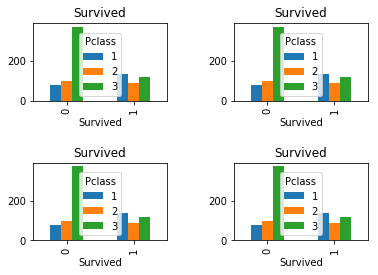

In [73]:
for i in range(4):
    df_.plot(ax=axes.flat[i], kind = 'bar', title = 'Survived')

fig